In [115]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scripts.save_csv import results_to_csv
from sklearn.feature_extraction.text import CountVectorizer



# Problem 3

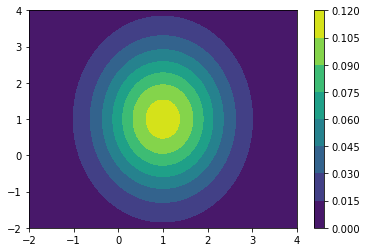

In [26]:
# Part 1
x = np.linspace(-2, 4, 500)
y = np.linspace(-2, 4, 500)
X,Y = np.meshgrid(x, y)
data = np.array([Y, X]).T


rv = scipy.stats.multivariate_normal([1, 1], [[1, 0], [0, 2]])


Z = rv.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

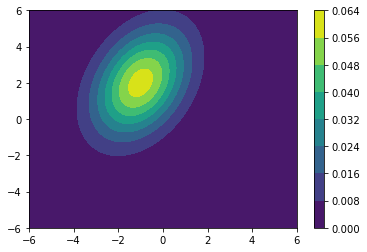

In [117]:
# Part 2
x = np.linspace(-6, 6, 500)
y = np.linspace(-6, 6, 500)
X,Y = np.meshgrid(x, y)
data = np.array([Y, X]).T


rv = scipy.stats.multivariate_normal([-1, 2], [[2, 1], [1, 4]])
Z = rv.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

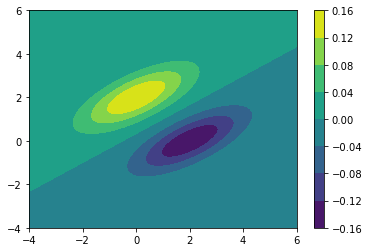

In [118]:
# Part 3
x = np.linspace(-4, 6, 500)
y = np.linspace(-4, 6, 500)
X,Y = np.meshgrid(x, y)
data = np.array([Y, X]).T


rv1 = scipy.stats.multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = scipy.stats.multivariate_normal([2, 0], [[2, 1], [1, 1]])
Z = rv1.pdf(data)-rv2.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

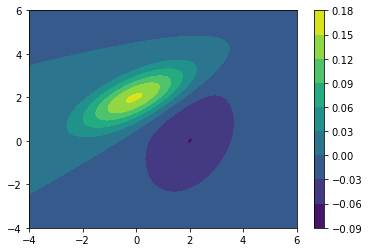

In [119]:
# Part 4
x = np.linspace(-4, 6, 500)
y = np.linspace(-4, 6, 500)
X,Y = np.meshgrid(x, y)
data = np.array([Y, X]).T


rv1 = scipy.stats.multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = scipy.stats.multivariate_normal([2, 0], [[2, 1], [1, 4]])
Z = rv1.pdf(data)-rv2.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

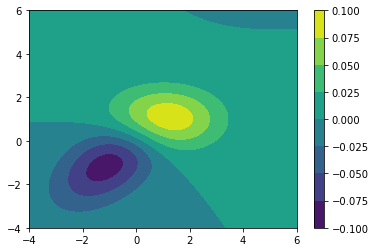

In [120]:
# Part 5
x = np.linspace(-4, 6, 500)
y = np.linspace(-4, 6, 500)
X,Y = np.meshgrid(x, y)
data = np.array([Y, X]).T


rv1 = scipy.stats.multivariate_normal([1, 1], [[2, 0], [0, 1]])
rv2 = scipy.stats.multivariate_normal([-1, -1], [[2, 1], [1, 2]])
Z = rv1.pdf(data)-rv2.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

# Problem 4

### 4.1

In [28]:
np.random.seed(0)
X1 = np.random.normal(loc=3, scale=3, size=100)
N = np.random.normal(loc=4, scale=2, size=100)
sample = [[x1, 0.5 * x1 + n] for (x1, n) in zip(X1, N)]
sample



[[8.292157037902992, 11.912379913064004],
 [4.20047162510167, 3.4047176902659424],
 [5.9362139523172175, 4.427136979187141],
 [9.722679597604373, 10.800133215118208],
 [8.602673970449903, 5.955090174996632],
 [0.06816636037076673, 7.921325551483969],
 [5.850265252576769, 6.09789466476889],
 [2.5459283751069064, 3.7780545646719377],
 [2.6903434446193266, 9.191055775270433],
 [4.231795505815117, 9.076927335776407],
 [3.4321307134826338, 9.451183277594456],
 [7.362820520888925, 9.493499576995234],
 [5.28311317544098, 4.919105217611085],
 [3.3650250494784855, 9.50264243093731],
 [4.331589698236277, 5.6297881072153775],
 [4.001022982122801, 7.605424282654191],
 [7.482237219472818, 9.635622545283905],
 [2.3845252087025974, 4.88224241816963],
 [3.9392031049527043, 7.197760293168512],
 [0.43771278209482567, 6.063269734180467],
 [-4.658969447502236, 2.423366338560141],
 [4.960855786321082, 4.281626311992152],
 [5.593308596578517, 7.39313064670137],
 [0.7735049387806741, 7.039524262764398],
 [9.

In [29]:
sample_mean = np.mean(sample, axis = 0)
# array([3.17942405, 5.75373796])

### 4.2

In [30]:
cov_mat = np.cov(np.array(sample).T)

# covariance
#  array([[9.23478745, 5.32353749],
#        [5.32353749, 7.34023779]])

### 4.3

In [31]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print(eigen_values)
print(eigen_vectors)

# eigen_values [13.69467278  2.88035245]
# eigen_vectors
# [[ 0.76654712 -0.64218807]
#  [ 0.64218807  0.76654712]]

[13.69467278  2.88035245]
[[ 0.76654712 -0.64218807]
 [ 0.64218807  0.76654712]]


### 4.4

Text(0, 0.5, 'X2')

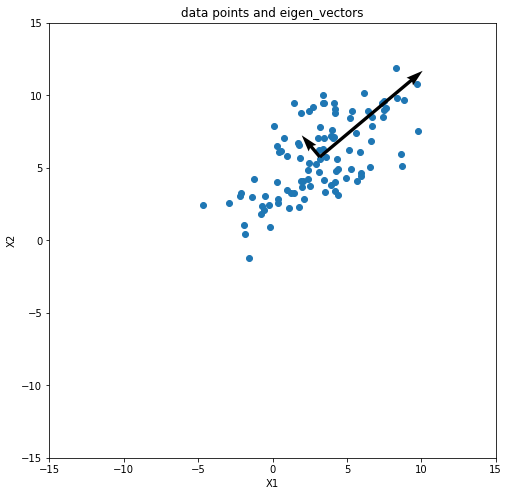

In [32]:
plt.figure(figsize=(8, 8))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.scatter([i for [i,j] in sample], [j for [i,j] in sample])

# # plot eigenvalue and eigenvec
X = [sample_mean[0], sample_mean[0]]
Y = [sample_mean[1], sample_mean[1]]
U = [eigen_vectors[0][0] * eigen_values[0], eigen_vectors[0][1] * eigen_values[1]]
V = [eigen_vectors[1][0] * eigen_values[0], eigen_vectors[1][1] * eigen_values[1]]

plt.quiver(X, Y, U, V, units = 'xy',scale=1.5)
plt.title('data points and eigen_vectors')
plt.xlabel('X1')
plt.ylabel('X2')

In [33]:
eigen_vectors.T

array([[ 0.76654712,  0.64218807],
       [-0.64218807,  0.76654712]])

In [34]:
data_rotated = np.dot(eigen_vectors.T, (sample - sample_mean).T).T
data_rotated


array([[ 7.87415712,  1.43755312],
       [-0.72583171, -2.4563393 ],
       [ 1.26128204, -2.78727975],
       [ 8.25644851, -0.3337009 ],
       [ 4.28648259, -3.32840043],
       [-0.99292673,  3.65957058],
       [ 2.26833896, -1.45137003],
       [-1.75436459, -1.10763106],
       [ 1.83250116,  2.94894779],
       [ 2.94080487,  1.87156085],
       [ 2.56816683,  2.67198085],
       [ 5.6084008 ,  0.18017619],
       [ 1.07658565, -1.99074938],
       [ 2.54977363,  2.75452117],
       [ 0.80359014, -0.83492044],
       [ 1.81892516,  0.89178378],
       [ 5.791209  ,  0.21243217],
       [-1.16899146, -0.15756785],
       [ 1.50974036,  0.61899011],
       [-1.90287326,  1.99796494],
       [-8.14722287,  2.48083599],
       [ 0.42017883, -2.27245715],
       [ 2.90315467, -0.29349612],
       [-1.01853374,  2.53066832],
       [ 6.21346475, -2.90713331],
       [-5.23815539,  0.82098714],
       [-0.71007878, -0.78195216],
       [ 1.46389915,  2.90121129],
       [ 5.56433612,

Text(0, 0.5, 'X2')

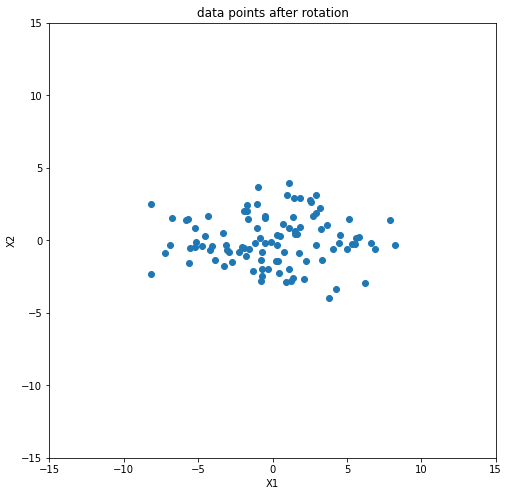

In [35]:
plt.figure(figsize=(8, 8))
plt.scatter(data_rotated[:, 0], data_rotated[:, 1])
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.title('data points after rotation')
plt.xlabel('X1')
plt.ylabel('X2')

# Problem 8


In [1]:
import numpy as np
import scipy.cluster
import scipy.ndimage
import matplotlib
import matplotlib.pyplot as plt

## Part 1

In [2]:
import pandas as pd
mnist = np.load(f"./data/mnist-data-hw3.npz")
train_data, train_labels = mnist['training_data'], mnist['training_labels']
train_data_normal = train_data/np.linalg.norm(train_data)
labels = np.unique(train_labels)

In [218]:
mnist_dict= {}
for label in labels:
    data = train_data_normal[train_labels == label]
    data = data.reshape(data.shape[0],-1)
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    mnist_dict[label] = (mean, cov)

In [206]:
mnist_dict

{0: (array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.58832440e-08,
         7.07475323e-08, 3.36482167e-08, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000

## Part 2


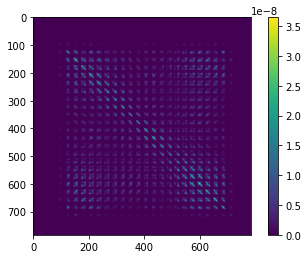

In [3]:
data = train_data_normal[train_labels == 3]
data = data.reshape(data.shape[0],-1)
ncov = np.cov(data, rowvar=False)
ncov[np.isnan(ncov)] = 0
ncov = np.abs(ncov)

plt.imshow(ncov)
plt.colorbar()
plt.show()

The diagonal elements are larger compared with the off-diagonal terms. That is beacause two close pixels are more correlated than two distant pixels. For example, the diagonal elements which is cov(X,X) should be salient on the plot.

## Part 3

In [4]:
from sklearn.model_selection import train_test_split
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=10000/train_data.shape[0], random_state=42)
def reshape_data(X):
    return X.reshape(X.shape[0],-1)

In [5]:
val_data = reshape_data(val_data)
train_data = reshape_data(train_data)

In [158]:
train_data.shape

(50000, 784)

In [113]:
# class GDA:
#     def fit(self, X, y):
#         X = X.reshape(X.shape[0],-1)
#         self.priors = dict()
#         self.means = dict()
#         self.cov = np.cov(X, rowvar=False)
#         self.classes = np.unique(y)

#         for c in self.classes:
#             X_c = X[y == c]
#             self.priors[c] = X_c.shape[0] / X.shape[0]
#             self.means[c] = np.mean(X_c, axis=0)
            
#     def predict_lda(self, X):
#         preds = list()
#         for x in X:
#             x = x.reshape(-1)
#             posts = list()
#             for c in self.classes:
#                 logpdf = (scipy.stats.multivariate_normal.logpdf(
#                     x, allow_singular=True, cov=self.cov, mean=self.means[c]))
#                 prior = np.log(self.priors[c])
#                 # inv_cov = np.linalg.inv(self.cov)
#                 # inv_cov_det = np.linalg.det(inv_cov)
#                 # diff = x-self.means[c]
#                 # likelihood = 0.5*np.log(inv_cov_det) - 0.5*diff.T @ inv_cov @ diff
#                 post = prior + logpdf
#                 posts.append(post)
#             pred = self.classes[np.argmax(posts)]
#             preds.append(pred)
#         return np.array(preds)

#     def accuracy(self, X, y):
#         pred = self.predict_lda(X)
#         return np.sum(pred == y) / y.shape[0]

In [6]:
import numpy as np
import scipy.stats
class GDA:
    def accuracy(self, X, y, mode):
        pred = self.predict(X, mode=mode)
        return np.sum(pred == y) / y.shape[0]

    def try_pos(self, cov):
        while np.any(np.linalg.eigvals(cov) < 0):
            cov = cov + 0.000001*np.identity(cov.shape[0])
        return cov

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.param_lst = []
        self.cov_lda = np.zeros((X.shape[1],X.shape[1]))
        for c in self.classes:
            data = X[y==c]
            mu = np.mean(data, axis=0)
            cov = np.cov(data, rowvar=False)
            cov = self.try_pos(cov)
            cov_qda = cov/data.shape[0]
            self.cov_lda= np.add(self.cov_lda, cov)
            prior = data.shape[0] / X.shape[0]
            self.param_lst.append((c, mu, cov_qda, prior))
        self.cov_lda = self.cov_lda / X.shape[0]

    def predict(self, X, mode):
        if mode == "lda":
            pred = []
            for (c, mu, cov_qda, prior) in self.param_lst:
                pred.append((scipy.stats.multivariate_normal.logpdf(
                    X, allow_singular=True, cov=self.cov_lda, mean=mu)
                    + np.log(prior)))
            return self.classes[np.argmax(pred, axis=0)]
        
        elif mode == "qda":
            pred = []
            for (c, mu, cov_qda, prior) in self.param_lst:
                pred.append((scipy.stats.multivariate_normal.logpdf(
                    X, allow_singular=True, cov=cov_qda, mean=mu)
                    + np.log(prior)))
            return self.classes[np.argmax(pred, axis=0)]



In [7]:
train_data.shape

(50000, 784)

## 3.a
Linear discriminant analysis (LDA). Model the class conditional probabilities
as Gaussians N( C;  ) with di erent means  C (for class C) and the same covariance
matrix  , which you compute by averaging the 10 covariance matrices from the 10
classes.

In [177]:
nums = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
lda_error = []
qda_error = []


for num in nums:
    gda = GDA()
    gda.fit(train_data[:num], train_labels[:num])
    err = 1 - gda.accuracy(val_data, val_labels, mode = "lda")
    lda_error.append(err)
    err = 1 - gda.accuracy(val_data, val_labels, mode = "qda")
    qda_error.append(err)

In [178]:
lda_error

# [0.3556,
#  0.36150000000000004,
#  0.6637,
#  0.33089999999999997,
#  0.21609999999999996,
#  0.15990000000000004,
#  0.14880000000000004,
#  0.13580000000000003,
#  0.1351]



[0.3557,
 0.3607,
 0.6635,
 0.33120000000000005,
 0.21619999999999995,
 0.15990000000000004,
 0.14880000000000004,
 0.13580000000000003,
 0.1351]

In [180]:
qda_error

# '''
[0.34219999999999995,
 0.20730000000000004,
 0.0947,
 0.08240000000000003,
 0.11209999999999998,
 0.3145,
 0.18879999999999997,
 0.16510000000000002,
 0.15839999999999999]
#  '''

[0.34219999999999995,
 0.20730000000000004,
 0.0947,
 0.08240000000000003,
 0.11209999999999998,
 0.3145,
 0.18879999999999997,
 0.16510000000000002,
 0.15839999999999999]

## 3.b
Quadratic discriminant analysis (QDA). Model the class conditional probabilities
as Gaussians N( C;  C), where  C is the estimated covariance matrix for class C.


Text(0.5, 1.0, 'LDA Training Size vs Error Rate')

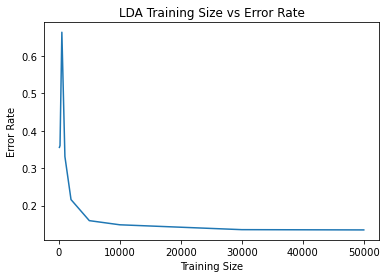

In [181]:
# 3.b

plt.plot(nums, lda_error)
plt.xlabel("Training Size")
plt.ylabel("Error Rate")
plt.title("LDA Training Size vs Error Rate")


Text(0.5, 1.0, 'QDA Training Size vs Error Rate')

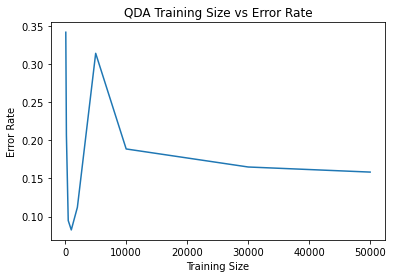

In [182]:
# 3.b
plt.plot(nums, qda_error)
plt.xlabel("Training Size")
plt.ylabel("Error Rate")
plt.title("QDA Training Size vs Error Rate")

#### 3.c
As the training size raises over 30000, the accuracy rate of QDA and LDA are very close. However, for a small training size, QDA performs better. One reason is QDA allows for more flexibility for the covariance matrix, tends to fit the data better than LDA.

### 3d

Include a plot of validation error versus the number of training
points for each digit. Plot all the 10 curves on the same graph as shown in Figure 1.
Which digit is easiest to classify? Include written answers where indicated.

In [8]:
train_data = reshape_data(train_data)
val_data = reshape_data(val_data)

In [9]:
train_data.shape

(50000, 784)

In [10]:
val_labels.shape

(10000,)

In [11]:
nums = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
error = []
# error [error of label 0-9 for each num]
for num in nums:
    gda = GDA()
    gda.fit(train_data[:num], train_labels[:num])
    err_lst = []
    for label in labels:
        new_val_data = val_data[val_labels==label]
        new_val_labels = val_labels[val_labels==label]
        err = 1 - gda.accuracy(new_val_data, new_val_labels, mode = "lda")
        err_lst.append(err)

    error.append(err_lst)

In [16]:
errors = np.array(error).T

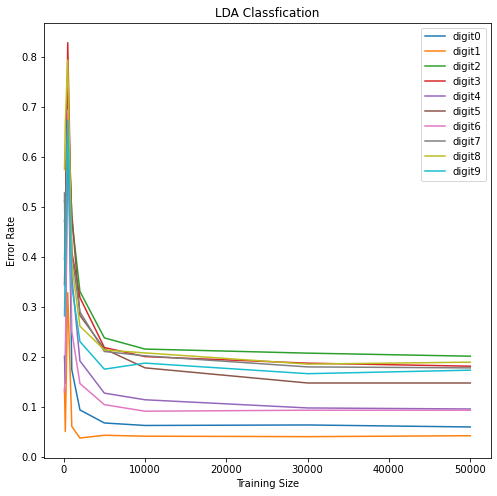

In [21]:
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.plot(nums, errors[i], label = f'digit{i}')
plt.xlabel("Training Size")
plt.ylabel("Error Rate")
plt.title("LDA Classfication")
plt.legend()

In [22]:
nums = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
error = []
# error [error of label 0-9 for each num]
for num in nums:
    gda = GDA()
    gda.fit(train_data[:num], train_labels[:num])
    err_lst = []
    for label in labels:
        new_val_data = val_data[val_labels==label]
        new_val_labels = val_labels[val_labels==label]
        err = 1 - gda.accuracy(new_val_data, new_val_labels, mode = "qda")
        err_lst.append(err)

    error.append(err_lst)

In [23]:
errors_qda = np.array(error).T

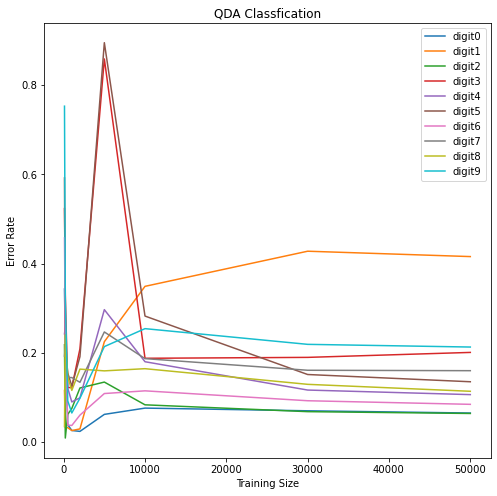

In [36]:
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.plot(nums, errors_qda[i], label = f'digit{i}')
plt.xlabel("Training Size")
plt.ylabel("Error Rate")
plt.title("QDA Classfication")
plt.legend()

**Written Answer**:
LDA: digit 1 is easiest to classify
QDA: digit 0 and 2 are easiest to classify

## Part 4 MNIST KAGGLE

In [ ]:
for k in mnist.files:
    print(k)

In [ ]:
test_data = mnist['test_data']
test_data = reshape_data(test_data)
gda = GDA()
gda.fit(train_data[:30000], train_labels[:30000])
result = gda.predict(test_data)

In [ ]:
results_to_csv(gda.predict(test_data))


In [ ]:
qda = GDA()
qda.fit(train_data[:500], train_labels[:500])
results_to_csv(qda.predict(test_data, mode='qda'))

## Part 5 SPAM KAGGLE

In [187]:
spam = np.load(f"./data/spam-data-hw3.npz")
train_data, train_labels = spam['training_data'], spam['training_labels']
train_data_normal = train_data/np.linalg.norm(train_data)
labels = np.unique(train_labels)

In [190]:
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)


In [191]:
nums = [100, 200, 500, 1000, 2000, 3000]
lda_error = []
qda_error = []


for num in nums:
    gda = GDA()
    gda.fit(train_data[:num], train_labels[:num])
    err = 1 - gda.accuracy(val_data, val_labels, mode = "lda")
    lda_error.append(err)
    err = 1 - gda.accuracy(val_data, val_labels, mode = "qda")
    qda_error.append(err)

In [192]:
lda_error
# [0.3039309683604986,
#  0.2540747842761265,
#  0.18696069031639506,
#  0.18312559923298177,
#  0.17641418983700863,
#  0.16682646212847552]

[0.3039309683604986,
 0.2540747842761265,
 0.18696069031639506,
 0.18312559923298177,
 0.17641418983700863,
 0.16682646212847552]

In [193]:
qda_error
# [0.3585810162991371,
#  0.2761265580057526,
#  0.3883029721955896,
#  0.4017257909875359,
#  0.5378715244487057,
#  0.5647171620325983]

[0.3585810162991371,
 0.2761265580057526,
 0.3883029721955896,
 0.4017257909875359,
 0.5378715244487057,
 0.5647171620325983]

In [201]:
clf = GDA()
clf.fit(train_data[:2000], train_labels[:2000])
results_to_csv(clf.predict(spam['test_data'], mode = 'lda'))


In [ ]:
spam = np.load(f"./data/spam-data-hw3.npz")
train_data, train_labels = spam['training_data'], spam['training_labels']
train_data_normal = scipy.cluster.vq.whiten(train_data)
labels = np.unique(train_labels)